In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('/content/train (1).csv')


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [ ]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [ ]:
train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1}).astype(int)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [ ]:
# from sklearn.preprocessing import Normalizer
# norm = Normalizer()
# norm.fit_transform(train_data)

array([[0.        , 0.12843962, 0.        , 0.94189052, 0.31039574],
       [0.01237655, 0.01237655, 0.01237655, 0.47030896, 0.88224143],
       [0.03651957, 0.10955871, 0.03651957, 0.94950881, 0.28941759],
       ...,
       [0.        , 0.07900374, 0.02633458, 0.78211378, 0.61754589],
       [0.02517367, 0.02517367, 0.        , 0.65451537, 0.75521004],
       [0.        , 0.09074   , 0.        , 0.96789329, 0.23441166]])

In [ ]:
y = train_data['Survived']
x= train_data.drop('Survived',axis=1)
x.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20)

In [ ]:
model1 = SVC()
model1.fit(x_train,y_train)

print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

0.6924157303370787
0.6424581005586593


In [ ]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

0.9775280898876404
0.8100558659217877


In [ ]:
model3 = MultinomialNB()
model3.fit(x_train,y_train)
print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

0.6952247191011236
0.6927374301675978


In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train,y_train)
print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

0.773876404494382
0.7877094972067039


In [ ]:
model5 = DecisionTreeClassifier()
model5.fit(x_train,y_train)
print(model5.score(x_train,y_train))
print(model5.score(x_test,y_test))

0.9789325842696629
0.7653631284916201


In [ ]:
import tensorflow as tf
from keras.models import Sequential
ANN_model = Sequential()
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
ANN_model.add(InputLayer(input_shape=(4, )))
# No hidden layers
ANN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
ANN_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = ANN_model.fit(x_train, y_train, 
                        epochs=100, batch_size=32,
                        validation_split=0.2,
                        verbose=1,
                        validation_data=[x_test,y_test], 
                        shuffle=True)

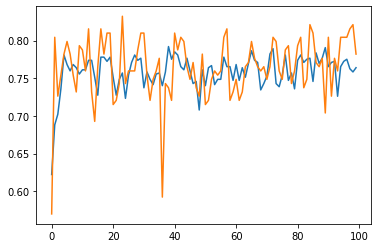

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# model 2  is the best RAndom forest 
test_data = pd.read_csv('/content/test (1).csv')

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data = test_data.dropna()

In [ ]:
id = test_data['PassengerId']
test_data.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'],axis=1,inplace=True)



In [ ]:
test_data.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [ ]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1}).astype(int)

In [ ]:
test_data.head()

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


In [ ]:
test_data.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data = test_data.dropna()

In [ ]:
test_data.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
y_pred = model2.predict(test_data)

In [ ]:
predicted = pd.DataFrame({'PassengerId':id,'pred':y_pred})

In [ ]:
predicted.head(10)


,PassengerId,pred
12,904,1
14,906,1
24,916,1
26,918,1
28,920,1
34,926,1
41,933,0
44,936,1
46,938,0
48,940,1
